We are working with the 'Iris Species' dataset. It's classic multi-class classification problem. In this project I will be using One-vs-Rest Logistic Regression Classifier to get predictions.

Source of the dataset: https://www.kaggle.com/uciml/iris

## Importing the modules

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

## Importing the data and preprocessing

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### As we can see we have 4 features

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### And we have 150 rows of features

In [8]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### We can see that data is sorted. I want to avoid this(reducing variance and overfitting less), so I will shuffle it.

In [11]:
data = data.sample(frac = 1)

#### Dividing the data into features and labels

In [12]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

#### Let's see what's the distribution of the data 

<AxesSubplot:ylabel='count'>

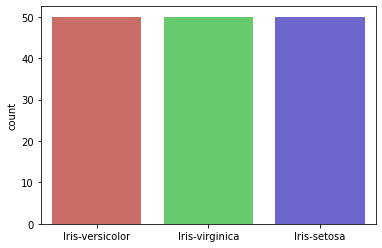

In [22]:
sns.countplot(x = y, data=data, palette='hls')

All labels have the same number of features rows.

#### Splitting the data into training and test data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the model(One-vs-Rest Logistic Regression)

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class = 'ovr', random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Results

#### Accuracy

In [41]:
print('Accuracy of logistic regression classifier on test set is: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set is: 0.97


#### Confusion matrix

<AxesSubplot:>

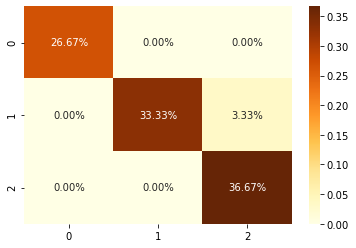

In [38]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='YlOrBr')

#### Precision, recall, F1 score, support

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

